In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("dataproject2022.csv", sep=';', index_col="ID",  thousands=',')
data= data.drop(['Pred_default (y_hat)', 'PD','Group'] , axis = 1)
train, test = train_test_split(data, test_size=0.2)



X_train = train.drop('Default (y)', axis=1)
y_train = train['Default (y)']
X_test = test.drop('Default (y)', axis=1)
y_test = test['Default (y)']

In [3]:
rf_tuned = RandomForestClassifier(criterion="gini", max_depth=10, max_features='auto', min_samples_leaf=5, min_samples_split=5, n_estimators=100)
rf_tuned.fit(X_train, y_train)
predictions_tuned = rf_tuned.predict(X_test)

print('Accuracy: %.3f' % accuracy_score(predictions_tuned, y_test))

Accuracy: 0.806


In [6]:
X_train

Job tenure  Age  Car price  Funding amount  Down payment  Loan duration  \
ID                                                                              
5482           0   26      18739           17739             0             96   
5311           1   46       5990            5990             0             48   
2924          13   46      11795            9795             0             48   
2134           2   23      15500           12500             0             36   
2031          38   55      15301            4625             1             24   
...          ...  ...        ...             ...           ...            ...   
2738          24   43       8890            6881             0             48   
425            1   25      12150           13322             0             72   
5869           8   38      14658           14158             0             60   
2806           6   26       9700            6700             0             36   
886            9   50       7600            2600             1             48   

      Monthly payment  Credit event  Married  Homeowner  
ID                                                       
5482             1134             0        0          0  
5311              986             0        1          1  
2924             1048             0        1          0  
2134             2288             0        0          0  
2031              995             0        1          0  
...               ...           ...      ...        ...  
2738              510             0        0          0  
425              1042             0        0          0  
5869             1723             0        1          1  
2806             1000             0        0          0  
886               317             0        0          0  

[5952 rows x 10 columns]

In [4]:
from interpretability_utils import display_lime

display_lime(X_train, rf_tuned, 5482)

/Users/martinquievre/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [106]:
X_train.columns[:3]

Index(['Job tenure', 'Age', 'Car price'], dtype='object')

In [107]:
X_train.columns

Index(['Job tenure', 'Age', 'Car price', 'Funding amount', 'Down payment',
       'Loan duration', 'Monthly payment', 'Credit event', 'Married',
       'Homeowner'],
      dtype='object')

PyALE._ALE_generic:INFO: Continuous feature detected.


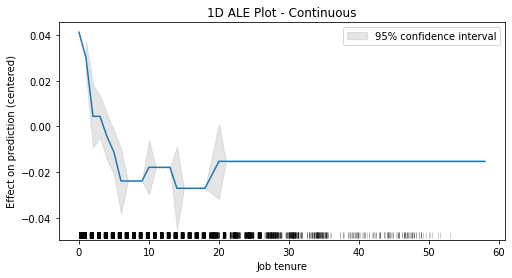

PyALE._ALE_generic:INFO: Continuous feature detected.


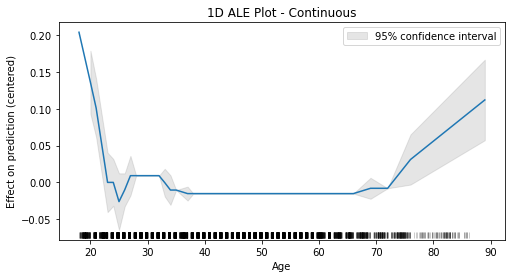

PyALE._ALE_generic:INFO: Continuous feature detected.


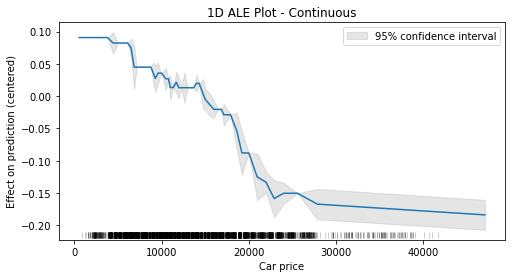

PyALE._ALE_generic:INFO: Continuous feature detected.


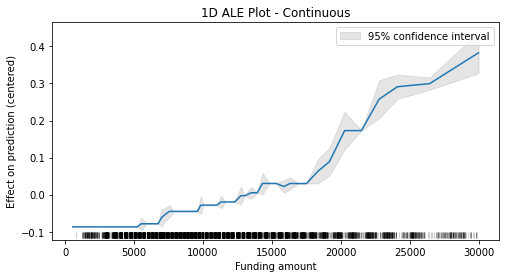

PyALE._ALE_generic:INFO: Discrete feature detected.


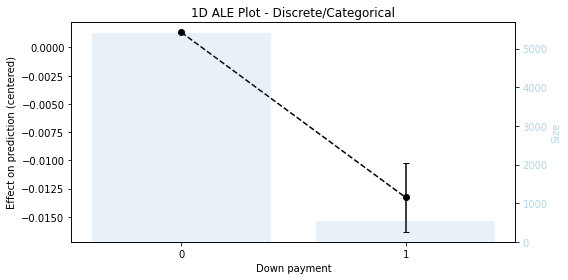

PyALE._ALE_generic:INFO: Continuous feature detected.


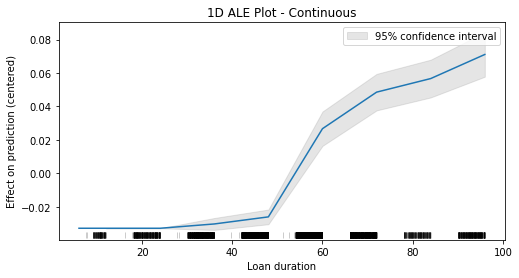

PyALE._ALE_generic:INFO: Continuous feature detected.


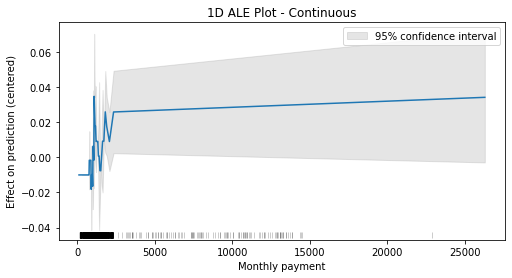

PyALE._ALE_generic:INFO: Discrete feature detected.


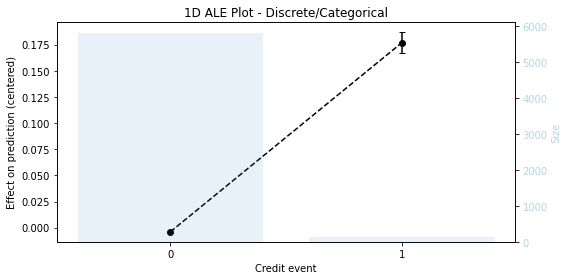

PyALE._ALE_generic:INFO: Discrete feature detected.


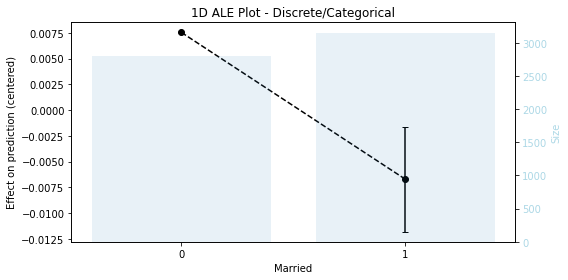

PyALE._ALE_generic:INFO: Discrete feature detected.


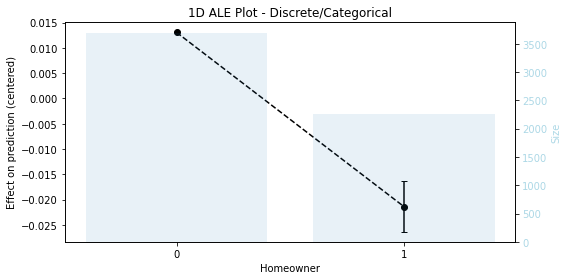

In [7]:
from interpretability_utils import plot_ale

plot_ale(X_train, rf_tuned)

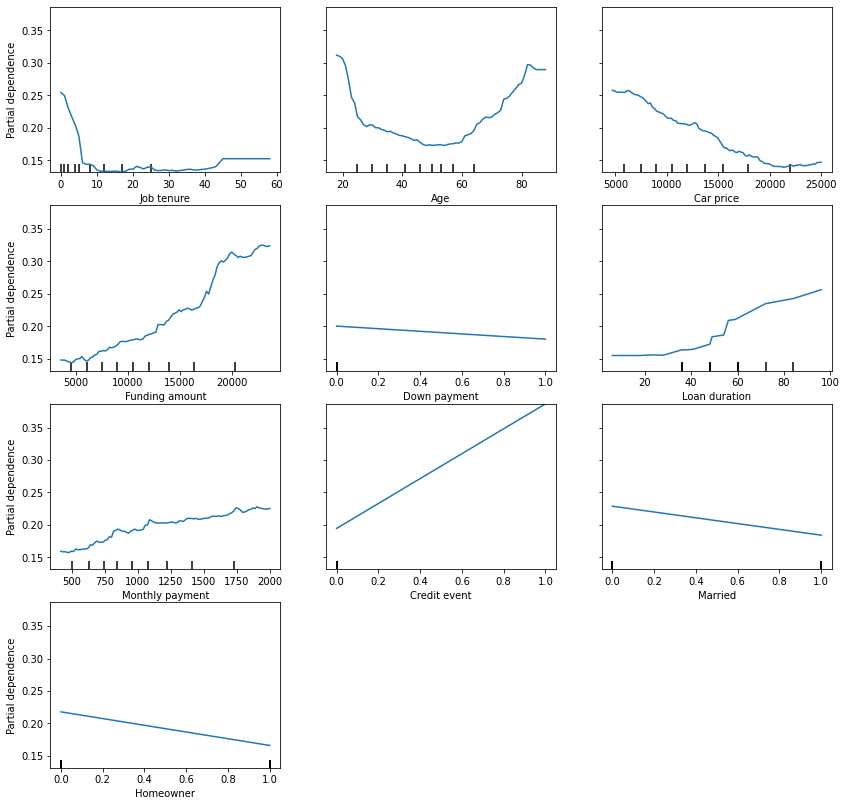

In [145]:
from sklearn.inspection import PartialDependenceDisplay


# for i in range(len(X_train.columns) - 1):
fig, ax = plt.subplots(figsize=(14, 14))

PartialDependenceDisplay.from_estimator(rf_tuned, X_train, range(len(X_train.columns)), ax=ax)

In [112]:
from PyALE import ale


In [113]:
X_train.columns

Index(['Job tenure', 'Age', 'Car price', 'Funding amount', 'Down payment',
       'Loan duration', 'Monthly payment', 'Credit event', 'Married',
       'Homeowner'],
      dtype='object')

PyALE._ALE_generic:INFO: Continuous feature detected.


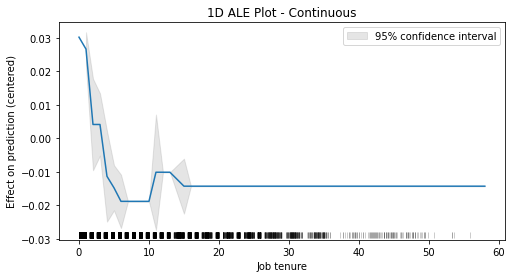

PyALE._ALE_generic:INFO: Continuous feature detected.


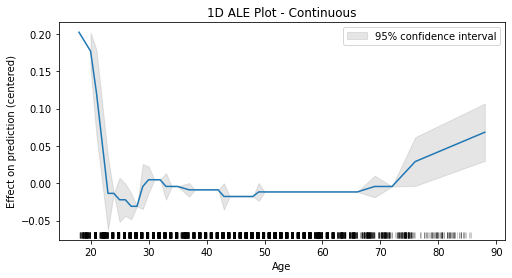

PyALE._ALE_generic:INFO: Continuous feature detected.


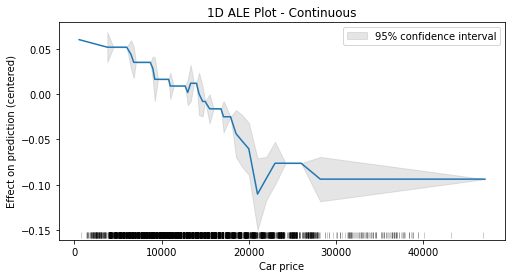

PyALE._ALE_generic:INFO: Continuous feature detected.


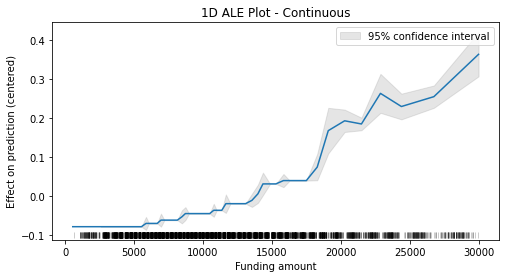

PyALE._ALE_generic:INFO: Discrete feature detected.


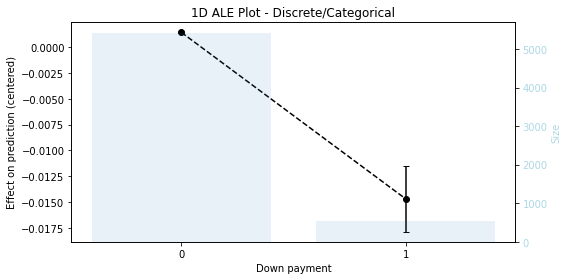

PyALE._ALE_generic:INFO: Continuous feature detected.


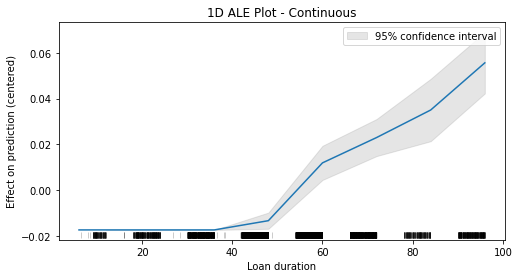

PyALE._ALE_generic:INFO: Continuous feature detected.


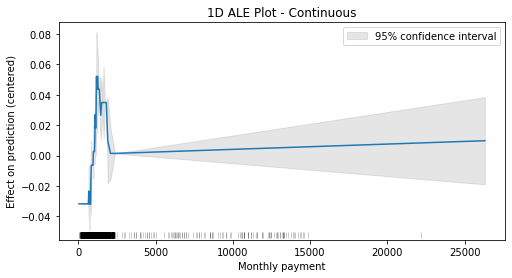

PyALE._ALE_generic:INFO: Discrete feature detected.


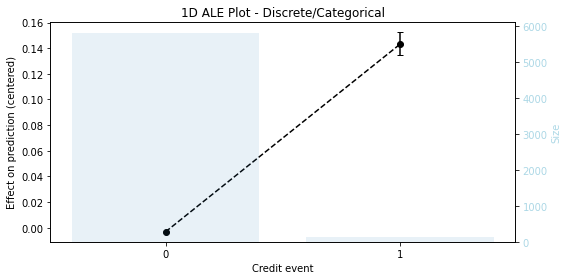

PyALE._ALE_generic:INFO: Discrete feature detected.


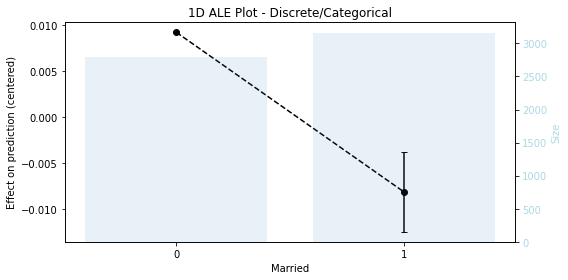

PyALE._ALE_generic:INFO: Discrete feature detected.


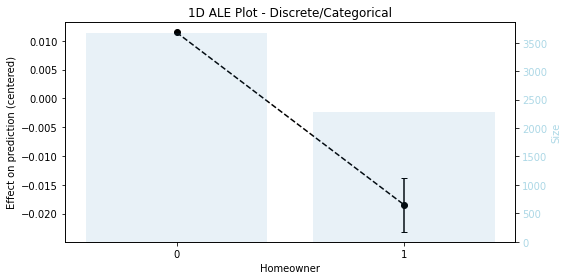

In [114]:
for each_f in X_train.columns:
    ale_eff = ale(
        X=X_train, model=rf_tuned, feature=[each_f], grid_size=50, include_CI=True, C=0.95

    )
    plt.show()

# ICE 

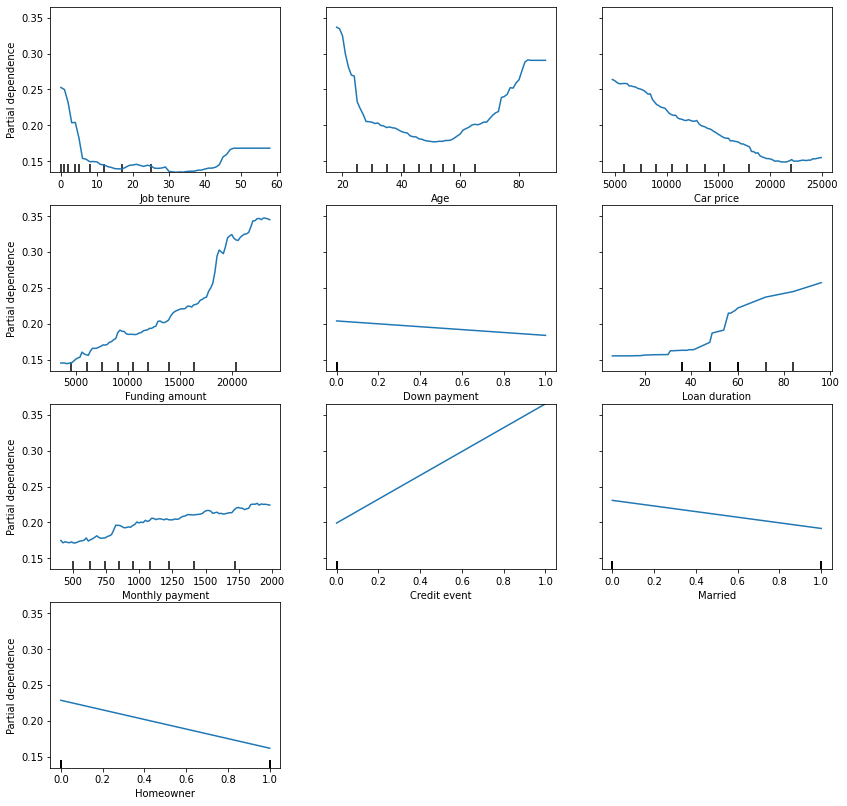

In [8]:
from interpretability_utils import plot_ice

plot_ice(X_train, rf_tuned)

Creating legend with loc="best" can be slow with large amounts of data.


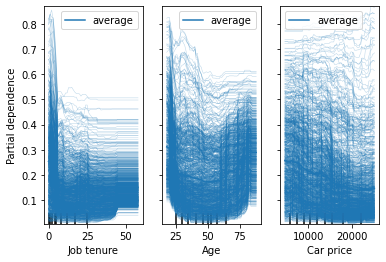

In [115]:
PartialDependenceDisplay.from_estimator(rf_tuned, X_train, [0, 1, 2], kind="both")



/Users/martinquievre/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


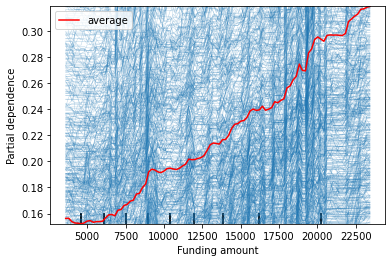

In [14]:
from sklearn.inspection import PartialDependenceDisplay
disp1 = PartialDependenceDisplay.from_estimator(rf_tuned, X_train, [3], kind="individual")
disp2 = PartialDependenceDisplay.from_estimator(rf_tuned, X_train, [3], kind="average", ax=disp1.axes_, line_kw={"color":"red", "label": "average"})

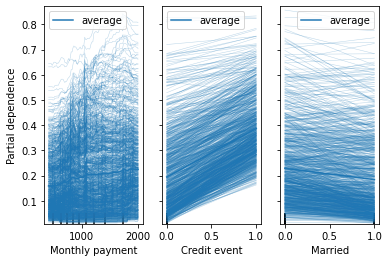

In [117]:
PartialDependenceDisplay.from_estimator(rf_tuned, X_train, [6, 7, 8], kind="both")

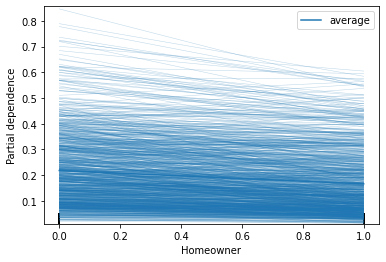

In [118]:
PartialDependenceDisplay.from_estimator(rf_tuned, X_train, [9], kind="both")

# Lime

In [10]:
X_train.columns

Index(['Job tenure', 'Age', 'Car price', 'Funding amount', 'Down payment',
       'Loan duration', 'Monthly payment', 'Credit event', 'Married',
       'Homeowner'],
      dtype='object')

In [8]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X_train.columns, discretize_continuous=True)


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
import lime
import lime.lime_tabular


In [120]:
# explainer = lime.lime_tabular.LimeTabularExplainer(X_t)
def prob(data):
    return np.array(list(zip(1-rf_tuned.predict(data),rf_tuned.predict(data))))
    

In [121]:
features = np.array(X_train)
feature_list = list(X_train.columns)

len(feature_list)


10

In [16]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.astype(int).values,  
mode='classification',feature_names=X_train.columns)

In [18]:

feature_list = list(X_train.columns)
i = 2
exp = explainer.explain_instance(X_train.loc[i,feature_list].astype(int).values, rf_tuned.predict_proba, num_features=10)

exp.show_in_notebook(show_table=True)

/Users/martinquievre/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# SHAP 

https://www.kaggle.com/code/vikumsw/explaining-random-forest-model-with-shapely-values

In [124]:
import shap
# print the JS visualization code to the notebook
shap.initjs()

In [126]:
train

Job tenure  Age  Car price  Funding amount  Down payment  Loan duration  \
ID                                                                              
3872           4   59      11420           11420             0             54   
630            4   61      11995           13313             0             84   
6277           6   46       8280            7886             0             60   
1004           4   21      18860           18990             0             96   
2060          17   62      10500            2500             1             24   
...          ...  ...        ...             ...           ...            ...   
4795           0   29      16730           11730             0             36   
5673          22   58      20990           10644             1             48   
4133          21   56      11450           11667             0             60   
2668           0   34      29990           28490             0             72   
1133           9   51      12655           12655             0             36   

      Monthly payment  Credit event  Married  Homeowner  Default (y)  
ID                                                                    
3872              706             0        1          1            0  
630               935             0        1          0            0  
6277              640             0        1          1            0  
1004             1542             0        0          0            1  
2060              510             0        1          0            0  
...               ...           ...      ...        ...          ...  
4795             1250             0        0          0            0  
5673             1114             0        0          0            0  
4133              879             0        1          1            0  
2668             2240             0        0          0            1  
1133             2229             0        0          0            0  

[5952 rows x 11 columns]

In [128]:
y_train

ID
3872    0
630     0
6277    0
1004    1
2060    0
       ..
4795    0
5673    0
4133    0
2668    1
1133    0
Name: Default (y), Length: 5952, dtype: int64

In [129]:
explainer = shap.TreeExplainer(rf_tuned)

In [134]:
choosen_instance = X_test.loc[[421]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)


What you see above is a force plot visualizing shapley values for the features. Feature values in pink cause to increase the prediction. Size of the bar shows the magnitude of the feature's effect. Feature values in blue cause to decrease the prediction. Sum of all feature SHAP values explain why model prediction was different from the baseline.

In [140]:
choosen_instance = X_test.loc[3866, :]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)
